In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")

In [2]:
from plotly import graph_objects as go

In [26]:
currency_returns=pd.read_csv(Path('Actual_returns.csv'))
currency_confidence_interval_returns=pd.read_csv(Path('Confidence_Interval.csv'))
currency_simulated_returns = pd.read_csv(Path('Pre_Covid_Monte_Carlo.csv'))

In [4]:
fig_currency_actual=px.line(currency_returns, range_y=[0.4,1.7])

In [5]:
currency_montecarlo_returns=px.line(currency_simulated_returns, range_y=[0.4,1.7])

In [6]:
simulated_ending_prices = currency_simulated_returns.iloc[-1, :]

In [7]:
row = pn.Row(currency_montecarlo_returns,fig_currency_actual)
row

Row
    [0] Plotly(Figure)
    [1] Plotly(Figure)

In [24]:
final_return=currency_returns.iloc[-1]
final_return

0    1.551967
Name: 254, dtype: float64

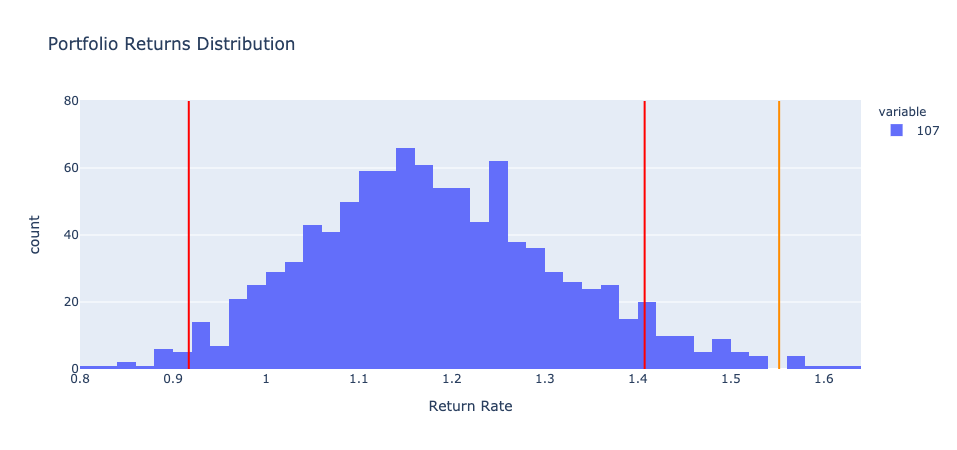

In [27]:
dist = px.histogram(simulated_ending_prices,nbins=50,labels={'value':'Return Rate'},title='Portfolio Returns Distribution')
dist= dist.add_shape(
        go.layout.Shape(type='line',
                        x0=1.551967,y0=0,x1=1.551967, y1=80,line=dict(color="DarkOrange")),
)
dist.add_shape(
        go.layout.Shape(type='line',
                        x0=0.917007155631468,y0=0,x1=0.917007155631468, y1=80,line=dict(color="Red")),
)
dist.add_shape(
        go.layout.Shape(type='line',
                        x0=1.40729,y0=0,x1=1.40729, y1=80,line=dict(color="Red")),
)
